In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
N = 1000
std = 0.6
bananas = pd.DataFrame({
    'length': np.random.normal(8, std, N),
    'width': np.random.normal(4, std, N),
    'class': np.zeros(N, dtype='int')}
)

apples = pd.DataFrame({
    'length': np.random.normal(6, std, N),
    'width': np.random.normal(6, std, N),
    'class': np.ones(N, dtype='int')}
)

fruits = pd.concat([bananas, apples])
print(fruits)

       length     width  class
0    8.151346  3.546191      0
1    8.005924  3.363878      0
2    8.410609  4.639982      0
3    7.591412  5.113743      0
4    7.867835  4.297891      0
..        ...       ...    ...
995  7.135425  5.878721      1
996  6.430407  5.647734      1
997  5.711795  6.187107      1
998  6.707507  6.903141      1
999  6.674129  5.949533      1

[2000 rows x 3 columns]


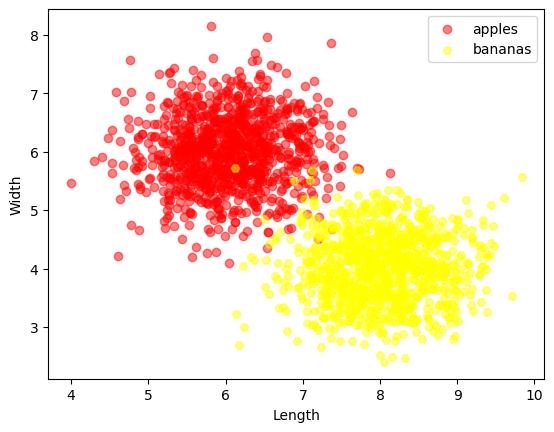

In [19]:
plt.scatter(x=apples['length'], y=apples['width'], label='apples', c='r', alpha=0.5)
plt.scatter(x=bananas['length'], y=bananas['width'], label='bananas', c='yellow', marker='H', alpha=0.5)
plt.legend()
plt.xlabel('Length')
plt.ylabel('Width')
plt.show()

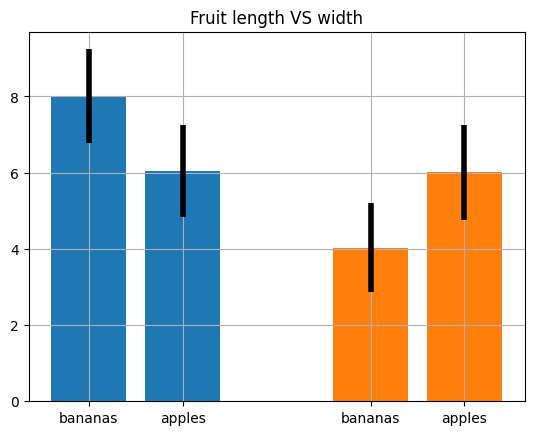

In [5]:
labels = ['bananas', 'apples', 'bananas', 'apples']
x = [1, 1.5, 2.5, 3.0]
height = [fruits.loc[fruits['class'] == 0, 'length'].mean(),
          fruits.loc[fruits['class'] == 1, 'length'].mean(),
          fruits.loc[fruits['class'] == 0, 'width'].mean(),
          fruits.loc[fruits['class'] == 1, 'width'].mean()]
yerr = [2*fruits.loc[fruits['class'] == 0, 'length'].std(),
        2*fruits.loc[fruits['class'] == 1, 'length'].std(),
        2*fruits.loc[fruits['class'] == 0, 'width'].std(),
        2*fruits.loc[fruits['class'] == 1, 'width'].std()]
color = ['tab:blue', 'tab:blue', 'tab:orange', 'tab:orange']

plt.bar(x=x,
        height=height,
        color=color,
        width=0.4,
        error_kw={'lw': 4},
        yerr=yerr)
plt.xticks(ticks=x, labels=labels)
plt.title('Fruit length VS width')

plt.grid()
plt.show()

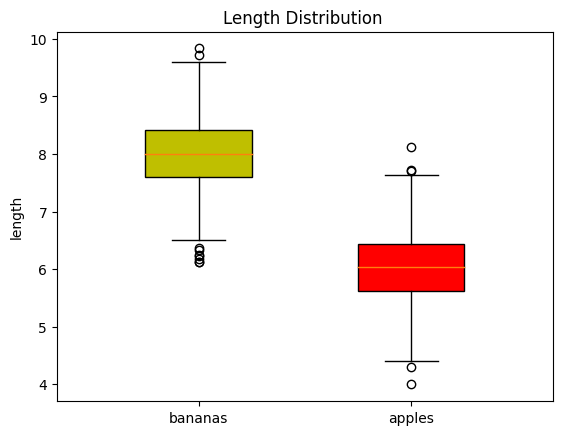

In [6]:
fea = 'length'
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 0],
            patch_artist=True, boxprops={'facecolor': 'y'},
            positions=[0], labels=['bananas'], widths=[0.15])
plt.boxplot(x=fea, data=fruits.loc[fruits['class'] == 1],
            patch_artist=True, boxprops={'facecolor': 'red'},
            positions=[0.3], labels=['apples'], widths=[0.15])
plt.ylabel('length')
plt.xlim(-0.2, 0.5)
plt.title('Length Distribution ')
plt.show()

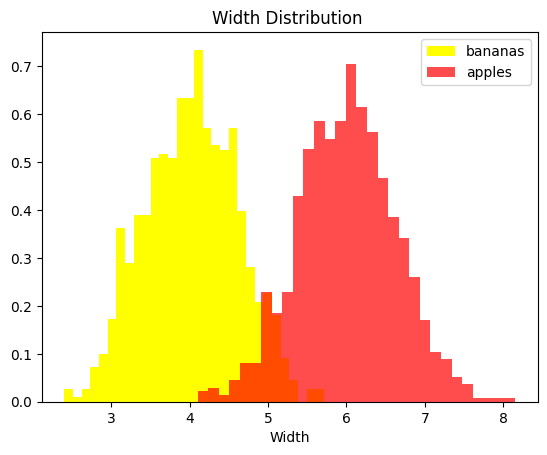

In [7]:
fea = 'width'

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='yellow', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='red', label='apples', alpha=0.7)
plt.legend()
plt.title('Width Distribution ')
plt.xlabel('Width')
plt.show()

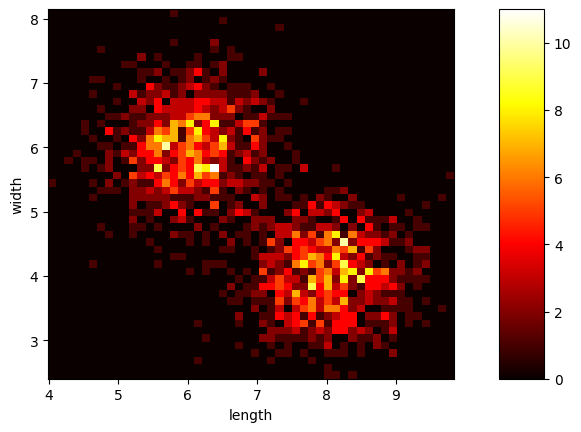

In [8]:
fig, (ax, cax) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [0.9, 0.1]})
_, _, _, mappable = ax.hist2d(
    x='length', y='width', bins=50, data=fruits, cmap=plt.cm.hot)
ax.set_xlabel('length')
ax.set_ylabel('width')

plt.colorbar(mappable=mappable, cax=cax, ax=ax)
plt.show()

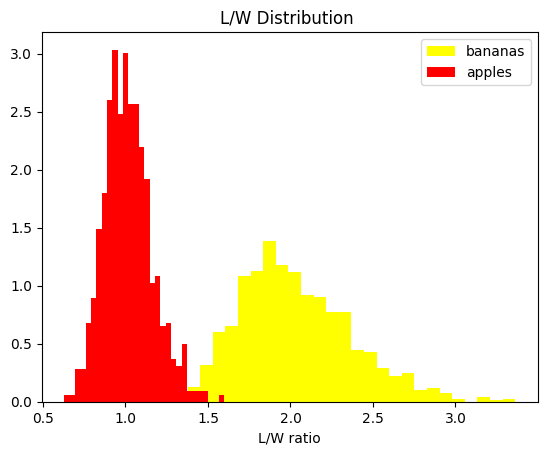

In [9]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']

plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0],
         bins=30, density=True, color='yellow', label='bananas',)
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1],
         bins=30, density=True, color='red', label='apples',)
plt.legend()
plt.title('L/W Distribution ')
plt.xlabel('L/W ratio')
plt.show()

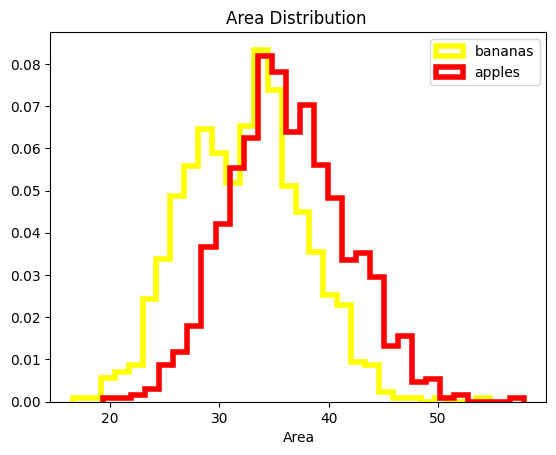

In [10]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='yellow', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='red', label='apples')
plt.title('Area Distribution ')
plt.legend()
plt.xlabel('Area')
plt.show()

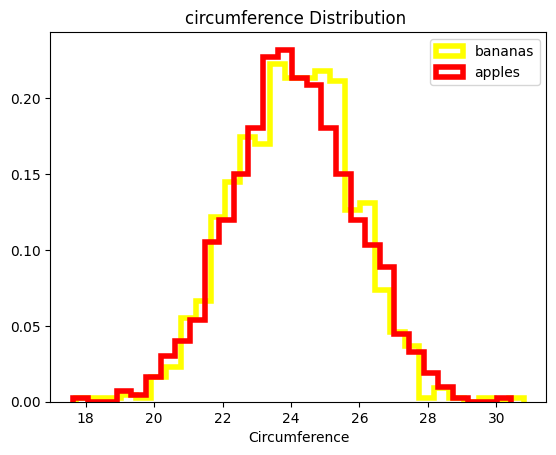

In [11]:
fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 0], histtype='step', lw=4,
         bins=30, density=True, color='yellow', label='bananas')
plt.hist(x=fea, data=fruits.loc[fruits['class'] == 1], histtype='step', lw=4,
         bins=30, density=True, color='red', label='apples')
plt.title('circumference Distribution ')
plt.legend()
plt.xlabel('Circumference')
plt.show()

In [12]:
fea = 'L/W'
fruits[fea] = fruits['length']/fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])             

Ttest_indResult(statistic=86.22061258307463, pvalue=0.0)

In [13]:
fea = 'area'
fruits[fea] = fruits['length']*fruits['width']
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])

Ttest_indResult(statistic=-16.689693391676396, pvalue=1.2077979838364824e-58)

In [14]:

fea = 'circumference'
fruits[fea] = 2*(fruits['length']+fruits['width'])
stats.ttest_ind(fruits.loc[fruits['class'] == 0, fea],
                fruits.loc[fruits['class'] == 1, fea])   

Ttest_indResult(statistic=-0.0220359387930215, pvalue=0.9824214878434665)